### Import libraries

In [1]:
import pandas as pd
import numpy as np

### import data

In [2]:
data = pd.read_csv("data_clean.csv")

### Data understanding

In [3]:
data.shape

(158, 10)

In [4]:
data.isna().sum()

Unnamed: 0     0
Ozone         38
Solar.R        7
Wind           0
Temp C         0
Month          0
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

In [5]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [6]:
data.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


In [7]:
data.describe(include="all")

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
count,158.000000,120.000000,151.000000,158.000000,158,158,158.000000,158.0,158.000000,155
unique,NaN,NaN,NaN,NaN,41,6,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,81,9,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,NaN,11,34,NaN,NaN,NaN,59
mean,79.500000,41.583333,185.403974,9.957595,NaN,NaN,16.006329,2010.0,77.727848,NaN
std,45.754781,32.620709,88.723103,3.511261,NaN,NaN,8.997166,0.0,9.377877,NaN
min,1.000000,1.000000,7.000000,1.700000,NaN,NaN,1.000000,2010.0,56.000000,NaN
25%,40.250000,18.000000,119.000000,7.400000,NaN,NaN,8.000000,2010.0,72.000000,NaN
50%,79.500000,30.500000,197.000000,9.700000,NaN,NaN,16.000000,2010.0,78.500000,NaN
75%,118.750000,61.500000,257.000000,11.875000,NaN,NaN,24.000000,2010.0,84.000000,NaN


In [8]:
data.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

### Dropping Columns

In [9]:
data2 = data.drop("Unnamed: 0",axis=1)

In [10]:
data2.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S


### Chaning Data Types

In [11]:
data2["Month"]= pd.to_numeric(data2["Month"],errors='coerce')

In [12]:
data2.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month      float64
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [13]:
data["Month"].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [14]:
data2["Month"].unique()

array([ 5., nan,  6.,  7.,  8.,  9.])

In [15]:
data["Temp C"].unique()

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', 'C',
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

In [16]:
data2["Temp C"]= pd.to_numeric(data2["Temp C"],errors='coerce')

In [17]:
data2["Temp C"].unique()

array([67., 72., 74., 62., 56., 66., 65., 59., 61., 69., nan, 68., 58.,
       64., 57., 73., 81., 79., 76., 78., 84., 85., 82., 87., 90., 93.,
       92., 80., 77., 75., 83., 88., 89., 91., 86., 97., 94., 96., 71.,
       63., 70.])

In [18]:
data2["Weather"] = data2["Weather"].astype("category")

In [19]:
data2.dtypes

Ozone       float64
Solar.R     float64
Wind        float64
Temp C      float64
Month       float64
Day           int64
Year          int64
Temp          int64
Weather    category
dtype: object

### Duplicates

In [20]:
data2[data2.duplicated()].shape

(1, 9)

In [21]:
data2.shape

(158, 9)

In [22]:
data_cleaned = data2.drop_duplicates()

In [23]:
data_cleaned[["Temp C", "Temp"]]

,Temp C,Temp
0,67.0,67
1,72.0,72
2,74.0,74
3,62.0,62
4,56.0,56
...,...,...
152,68.0,68
153,67.0,67
154,70.0,70
155,77.0,77


In [24]:
data_cleaned.drop("Temp C",axis=1,inplace=True)

C:\Users\Chetan\AppData\Local\Temp\ipykernel_3076\749782836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop("Temp C",axis=1,inplace=True)


In [25]:
data_cleaned.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S


### Rename the columns

In [26]:
data_cleaned = data_cleaned.rename({"Solar.R":"Solar"},axis=1)

In [27]:
data_cleaned.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

### Outlier Detection

<Axes: >

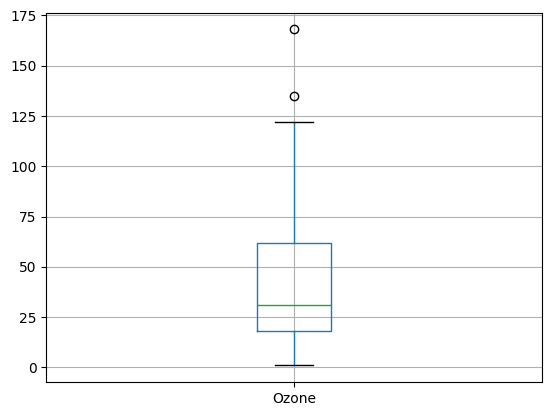

In [28]:
data_cleaned.boxplot(["Ozone"])

In [29]:
data_cleaned["Weather"].value_counts()

Weather
S     58
C     49
PS    47
Name: count, dtype: int64

### Missing Values & Imputation

In [30]:
import seaborn as sns
from matplotlib import pyplot as plt

In [31]:
data_cleaned.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

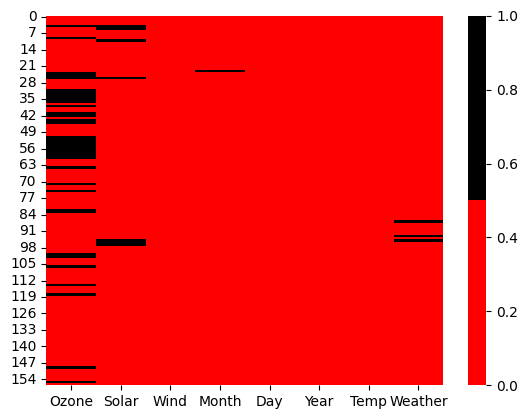

In [32]:
colors = ['red','black']
sns.heatmap(data_cleaned.isnull(),cmap=sns.color_palette(colors))
plt.show()

In [33]:
data_cleaned.groupby(by='Weather')["Ozone"].median()

C:\Users\Chetan\AppData\Local\Temp\ipykernel_3076\823097853.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_cleaned.groupby(by='Weather')["Ozone"].median()


Weather
C     37.0
PS    29.5
S     28.0
Name: Ozone, dtype: float64

In [34]:
data_cleaned.groupby(by='Weather')["Ozone"].mean()

C:\Users\Chetan\AppData\Local\Temp\ipykernel_3076\3526095005.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_cleaned.groupby(by='Weather')["Ozone"].mean()


Weather
C     46.162162
PS    42.194444
S     37.441860
Name: Ozone, dtype: float64

In [35]:
data_cleaned["Ozone"].median()

np.float64(31.0)

In [36]:
data_cleaned["Ozone"].mean()

np.float64(41.81512605042017)

In [37]:
data_cleaned_2 = data_cleaned[data_cleaned["Weather"]=="C"].fillna(value={"Ozone":37.0})

In [38]:
data_cleaned_3 = pd.concat([data_cleaned_2,data_cleaned[data_cleaned["Weather"]=="PS"].fillna(value={"Ozone":29.5}),
           data_cleaned[data_cleaned["Weather"]=="S"].fillna(value={"Ozone":28.0})])

In [39]:
data_cleaned_3.isna().sum()

Ozone      0
Solar      6
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [40]:
data_cleaned_3["Solar"].mean()

np.float64(187.15540540540542)

In [41]:
data_cleaned_3["Solar"] = data_cleaned_3["Solar"].fillna(data_cleaned_3["Solar"].mean())

In [42]:
data_cleaned_3["Month"] = data_cleaned_3["Month"].fillna(5)

In [43]:
data_cleaned_3.isna().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64